<a href="https://colab.research.google.com/github/MaximKray21/digit_methods/blob/About_ML/gradient_boosting_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
X, y = make_regression(n_samples=10,n_features=3)

In [ ]:
X

array([[-1.31838402, -1.51907296,  0.08493955],
       [-2.06559129,  1.00065027, -0.42646513],
       [-0.4762085 , -0.64973174, -0.65156105],
       [-0.22895976,  1.63456304,  1.98340427],
       [ 1.12113685,  1.98246591, -0.18035342],
       [ 1.21741201, -0.08914702,  0.68652575],
       [ 0.99575919, -0.88447438, -0.68861304],
       [ 1.10970639,  0.48009525,  0.63612759],
       [ 0.00787309,  0.36512726, -1.7394705 ],
       [ 1.49065405,  1.78945998, -0.42610538]])

In [ ]:
y

array([-163.2783901 ,  -18.12863844,  -66.73597756,  107.25591077,
        187.41519603,   46.3675759 ,  -20.43186235,   81.83014433,
         24.43356343,  189.36997768])

In [ ]:
df = pd.DataFrame(X)

In [ ]:
df['y_true'] = y

In [ ]:
df['y_pred_0'] = df['y_true'].mean()

In [ ]:
df

,0,1,2,y_true,y_pred_0
0,-1.318384,-1.519073,0.084940,-163.278390,36.80975
1,-2.065591,1.000650,-0.426465,-18.128638,36.80975
2,-0.476208,-0.649732,-0.651561,-66.735978,36.80975
3,-0.228960,1.634563,1.983404,107.255911,36.80975
4,1.121137,1.982466,-0.180353,187.415196,36.80975
5,1.217412,-0.089147,0.686526,46.367576,36.80975
6,0.995759,-0.884474,-0.688613,-20.431862,36.80975
7,1.109706,0.480095,0.636128,81.830144,36.80975
8,0.007873,0.365127,-1.739471,24.433563,36.80975
9,1.490654,1.789460,-0.426105,189.369978,36.80975


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_absolute_error(df['y_true'],df['y_pred_0'])

85.63801097313119

In [ ]:
df['residual_0'] = df['y_true'] - df['y_pred_0']

In [ ]:
df

,0,1,2,y_true,y_pred_0,residual_0
0,-1.318384,-1.519073,0.084940,-163.278390,36.80975,-200.088140
1,-2.065591,1.000650,-0.426465,-18.128638,36.80975,-54.938388
2,-0.476208,-0.649732,-0.651561,-66.735978,36.80975,-103.545728
3,-0.228960,1.634563,1.983404,107.255911,36.80975,70.446161
4,1.121137,1.982466,-0.180353,187.415196,36.80975,150.605446
5,1.217412,-0.089147,0.686526,46.367576,36.80975,9.557826
6,0.995759,-0.884474,-0.688613,-20.431862,36.80975,-57.241612
7,1.109706,0.480095,0.636128,81.830144,36.80975,45.020394
8,0.007873,0.365127,-1.739471,24.433563,36.80975,-12.376187
9,1.490654,1.789460,-0.426105,189.369978,36.80975,152.560228


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
tree_1 = DecisionTreeRegressor(max_depth=1)

In [ ]:
tree_1.fit(df[[0,1,2]],df['residual_0'])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
df['tree_pred_1'] = tree_1.predict(df[[0,1,2]])

In [ ]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1
0,-1.318384,-1.519073,0.084940,-163.278390,36.80975,-200.088140,-53.373119
1,-2.065591,1.000650,-0.426465,-18.128638,36.80975,-54.938388,-53.373119
2,-0.476208,-0.649732,-0.651561,-66.735978,36.80975,-103.545728,-53.373119
3,-0.228960,1.634563,1.983404,107.255911,36.80975,70.446161,124.537278
4,1.121137,1.982466,-0.180353,187.415196,36.80975,150.605446,124.537278
5,1.217412,-0.089147,0.686526,46.367576,36.80975,9.557826,-53.373119
6,0.995759,-0.884474,-0.688613,-20.431862,36.80975,-57.241612,-53.373119
7,1.109706,0.480095,0.636128,81.830144,36.80975,45.020394,-53.373119
8,0.007873,0.365127,-1.739471,24.433563,36.80975,-12.376187,-53.373119
9,1.490654,1.789460,-0.426105,189.369978,36.80975,152.560228,124.537278


In [ ]:
from sklearn.tree import plot_tree

[Text(167.4, 163.07999999999998, 'X[1] <= 1.318\nmse = 11024.245\nsamples = 10\nvalue = 0.0'),
 Text(83.7, 54.360000000000014, 'mse = 5626.048\nsamples = 7\nvalue = -53.373'),
 Text(251.10000000000002, 54.360000000000014, 'mse = 1463.561\nsamples = 3\nvalue = 124.537')]

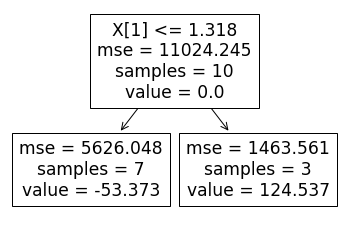

In [ ]:
plot_tree(tree_1)

In [ ]:
nu = 0.1

In [ ]:
df['y_pred_1'] = df['y_pred_0'] + nu*df['tree_pred_1']

In [ ]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1
0,-1.318384,-1.519073,0.084940,-163.278390,36.80975,-200.088140,-53.373119,31.472438
1,-2.065591,1.000650,-0.426465,-18.128638,36.80975,-54.938388,-53.373119,31.472438
2,-0.476208,-0.649732,-0.651561,-66.735978,36.80975,-103.545728,-53.373119,31.472438
3,-0.228960,1.634563,1.983404,107.255911,36.80975,70.446161,124.537278,49.263478
4,1.121137,1.982466,-0.180353,187.415196,36.80975,150.605446,124.537278,49.263478
5,1.217412,-0.089147,0.686526,46.367576,36.80975,9.557826,-53.373119,31.472438
6,0.995759,-0.884474,-0.688613,-20.431862,36.80975,-57.241612,-53.373119,31.472438
7,1.109706,0.480095,0.636128,81.830144,36.80975,45.020394,-53.373119,31.472438
8,0.007873,0.365127,-1.739471,24.433563,36.80975,-12.376187,-53.373119,31.472438
9,1.490654,1.789460,-0.426105,189.369978,36.80975,152.560228,124.537278,49.263478


In [ ]:
mean_absolute_error(df['y_true'],df['y_pred_0'])

85.63801097313119

In [ ]:
mean_absolute_error(df['y_true'],df['y_pred_1'])

80.30069905075203

In [ ]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1
0,-1.318384,-1.519073,0.084940,-163.278390,36.80975,-200.088140,-53.373119,31.472438
1,-2.065591,1.000650,-0.426465,-18.128638,36.80975,-54.938388,-53.373119,31.472438
2,-0.476208,-0.649732,-0.651561,-66.735978,36.80975,-103.545728,-53.373119,31.472438
3,-0.228960,1.634563,1.983404,107.255911,36.80975,70.446161,124.537278,49.263478
4,1.121137,1.982466,-0.180353,187.415196,36.80975,150.605446,124.537278,49.263478
5,1.217412,-0.089147,0.686526,46.367576,36.80975,9.557826,-53.373119,31.472438
6,0.995759,-0.884474,-0.688613,-20.431862,36.80975,-57.241612,-53.373119,31.472438
7,1.109706,0.480095,0.636128,81.830144,36.80975,45.020394,-53.373119,31.472438
8,0.007873,0.365127,-1.739471,24.433563,36.80975,-12.376187,-53.373119,31.472438
9,1.490654,1.789460,-0.426105,189.369978,36.80975,152.560228,124.537278,49.263478


In [ ]:
df['residual_1'] = df['y_true'] - df['y_pred_1']

In [ ]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1
0,-1.318384,-1.519073,0.084940,-163.278390,36.80975,-200.088140,-53.373119,31.472438,-194.750828
1,-2.065591,1.000650,-0.426465,-18.128638,36.80975,-54.938388,-53.373119,31.472438,-49.601076
2,-0.476208,-0.649732,-0.651561,-66.735978,36.80975,-103.545728,-53.373119,31.472438,-98.208416
3,-0.228960,1.634563,1.983404,107.255911,36.80975,70.446161,124.537278,49.263478,57.992433
4,1.121137,1.982466,-0.180353,187.415196,36.80975,150.605446,124.537278,49.263478,138.151718
5,1.217412,-0.089147,0.686526,46.367576,36.80975,9.557826,-53.373119,31.472438,14.895138
6,0.995759,-0.884474,-0.688613,-20.431862,36.80975,-57.241612,-53.373119,31.472438,-51.904300
7,1.109706,0.480095,0.636128,81.830144,36.80975,45.020394,-53.373119,31.472438,50.357706
8,0.007873,0.365127,-1.739471,24.433563,36.80975,-12.376187,-53.373119,31.472438,-7.038875
9,1.490654,1.789460,-0.426105,189.369978,36.80975,152.560228,124.537278,49.263478,140.106500


In [ ]:
tree_2 = DecisionTreeRegressor(max_depth=1)

In [ ]:
tree_2.fit(df[[0,1,2]],df['residual_1'])

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=1,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
df['y_pred_2'] = df['y_pred_1'] + nu * tree_2.predict(df[[0,1,2]])

In [ ]:
df

,0,1,2,y_true,y_pred_0,residual_0,tree_pred_1,y_pred_1,residual_1,y_pred_2
0,-1.318384,-1.519073,0.084940,-163.278390,36.80975,-200.088140,-53.373119,31.472438,-194.750828,19.976987
1,-2.065591,1.000650,-0.426465,-18.128638,36.80975,-54.938388,-53.373119,31.472438,-49.601076,36.399060
2,-0.476208,-0.649732,-0.651561,-66.735978,36.80975,-103.545728,-53.373119,31.472438,-98.208416,19.976987
3,-0.228960,1.634563,1.983404,107.255911,36.80975,70.446161,124.537278,49.263478,57.992433,54.190100
4,1.121137,1.982466,-0.180353,187.415196,36.80975,150.605446,124.537278,49.263478,138.151718,54.190100
5,1.217412,-0.089147,0.686526,46.367576,36.80975,9.557826,-53.373119,31.472438,14.895138,36.399060
6,0.995759,-0.884474,-0.688613,-20.431862,36.80975,-57.241612,-53.373119,31.472438,-51.904300,19.976987
7,1.109706,0.480095,0.636128,81.830144,36.80975,45.020394,-53.373119,31.472438,50.357706,36.399060
8,0.007873,0.365127,-1.739471,24.433563,36.80975,-12.376187,-53.373119,31.472438,-7.038875,36.399060
9,1.490654,1.789460,-0.426105,189.369978,36.80975,152.560228,124.537278,49.263478,140.106500,54.190100


In [ ]:
mean_absolute_error(df['y_true'],df['y_pred_1'])

80.30069905075203

In [ ]:
mean_absolute_error(df['y_true'],df['y_pred_2'])

75.37407699138947

In [ ]:
df = df[[0,1,2,'y_true']].copy()

In [ ]:
df

,0,1,2,y_true
0,-1.318384,-1.519073,0.084940,-163.278390
1,-2.065591,1.000650,-0.426465,-18.128638
2,-0.476208,-0.649732,-0.651561,-66.735978
3,-0.228960,1.634563,1.983404,107.255911
4,1.121137,1.982466,-0.180353,187.415196
5,1.217412,-0.089147,0.686526,46.367576
6,0.995759,-0.884474,-0.688613,-20.431862
7,1.109706,0.480095,0.636128,81.830144
8,0.007873,0.365127,-1.739471,24.433563
9,1.490654,1.789460,-0.426105,189.369978


In [ ]:
n = 1000
nu = 0.1
trees = []
df['y_pred'] = df['y_true'].mean()

for i in range(n):
  df['residual'] = df['y_true'] - df['y_pred']
  tree = DecisionTreeRegressor(max_depth=1)
  tree.fit(df[[0,1,2]],df['residual'])
  df['y_pred'] += nu * tree.predict(df[[0,1,2]])
  trees.append(tree)
  print(mean_absolute_error(df['y_true'],df['y_pred']))

80.30069905075203
75.37407699138947
70.73841928625117
66.3446505460171
62.34181523267951
58.558973451326175
54.94698000784932
50.816404812729104
48.31663400863107
46.76259010035251


In [ ]:
test = df[[0,1,2]].copy()

In [ ]:
test['y_pred'] = df['y_true'].mean()

In [ ]:
for tree in trees:
  test['y_pred'] += nu * tree.predict(df[[0,1,2]])

In [ ]:
from sympy import *

In [ ]:
y_true = Symbol('y_true')
y_pred = Symbol('y_pred')

In [ ]:
1/2*(y_true-y_pred)**2

0.5*(-y_pred + y_true)**2

In [ ]:
diff(1/2*(y_true-y_pred)**2,y_pred)

1.0*y_pred - 1.0*y_true

In [ ]:
-(y_true - y_pred)

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=10,n_features=3,n_redundant=0)

In [ ]:
df = pd.DataFrame(X)

In [ ]:
df['y_true'] = y

In [ ]:
df

,0,1,2,y_true
0,-0.041103,2.246613,-1.686811,1
1,0.522613,0.270418,-0.985522,1
2,1.760704,1.888991,-1.571686,1
3,2.380392,-0.976465,-0.266010,0
4,-0.920377,-0.780406,0.527424,0
5,-0.427530,0.358899,2.122867,0
6,-2.069708,0.479868,1.030371,1
7,1.352707,-0.991230,1.580608,0
8,-1.160031,0.709400,-0.090182,1
9,-0.021277,1.436094,-0.098302,0


In [ ]:
df['y_pred'] = df['y_true'].mean()

In [ ]:
df

,0,1,2,y_true,y_pred
0,-0.041103,2.246613,-1.686811,1,0.5
1,0.522613,0.270418,-0.985522,1,0.5
2,1.760704,1.888991,-1.571686,1,0.5
3,2.380392,-0.976465,-0.266010,0,0.5
4,-0.920377,-0.780406,0.527424,0,0.5
5,-0.427530,0.358899,2.122867,0,0.5
6,-2.069708,0.479868,1.030371,1,0.5
7,1.352707,-0.991230,1.580608,0,0.5
8,-1.160031,0.709400,-0.090182,1,0.5
9,-0.021277,1.436094,-0.098302,0,0.5


In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
roc_auc_score(df['y_true'],df['y_pred'])

0.5

In [ ]:
n = 10
nu = 0.1
trees = []
df['y_pred'] = df['y_true'].mean()

for i in range(n):
  df['residual'] = df['y_true'] - df['y_pred']
  tree = DecisionTreeRegressor(max_depth=1)
  tree.fit(df[[0,1,2]],df['residual'])
  df['y_pred'] += nu * tree.predict(df[[0,1,2]])
  trees.append(tree)
  print(roc_auc_score(df['y_true'],df['y_pred']))

0.8
0.92
0.92
0.92
1.0
1.0
1.0
1.0
1.0
1.0


In [ ]:
df

,0,1,2,y_true,y_pred,residual
0,-0.041103,2.246613,-1.686811,1,0.701910,0.331212
1,0.522613,0.270418,-0.985522,1,0.701910,0.331212
2,1.760704,1.888991,-1.571686,1,0.701910,0.331212
3,2.380392,-0.976465,-0.266010,0,0.289055,-0.303249
4,-0.920377,-0.780406,0.527424,0,0.289055,-0.303249
5,-0.427530,0.358899,2.122867,0,0.419202,-0.433397
6,-2.069708,0.479868,1.030371,1,0.594352,0.391453
7,1.352707,-0.991230,1.580608,0,0.289055,-0.303249
8,-1.160031,0.709400,-0.090182,1,0.594352,0.391453
9,-0.021277,1.436094,-0.098302,0,0.419202,-0.433397


In [ ]:
roc_auc_score(df['y_true'],df['y_pred'])